In [2]:
import pandas as pd
import seaborn as sns
inventory = pd.read_csv('T_F41SCHEDULE_B43.zip')

<ipython-input-2-93c306825ac8>:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  inventory = pd.read_csv('T_F41SCHEDULE_B43.zip')


In [3]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132313 entries, 0 to 132312
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 132313 non-null  int64  
 1   CARRIER              132264 non-null  object 
 2   CARRIER_NAME         132208 non-null  object 
 3   MANUFACTURE_YEAR     132310 non-null  float64
 4   UNIQUE_CARRIER_NAME  132208 non-null  object 
 5   SERIAL_NUMBER        132313 non-null  object 
 6   TAIL_NUMBER          132313 non-null  object 
 7   AIRCRAFT_STATUS      132313 non-null  object 
 8   OPERATING_STATUS     132313 non-null  object 
 9   NUMBER_OF_SEATS      132306 non-null  float64
 10  MANUFACTURER         132313 non-null  object 
 11  AIRCRAFT_TYPE        102380 non-null  object 
 12  MODEL                132302 non-null  object 
 13  CAPACITY_IN_POUNDS   132212 non-null  float64
 14  ACQUISITION_DATE     131346 non-null  object 
 15  AIRLINE_ID       

# Question 1
1. Investigate the missing data in this dataset. Specifically, for each of the following variables that have missing data, decide if any imputation is possible. Give your reasoning and code if you decide to impute missing values.
Columns for investigation: CARRIER, CARRIER_NAME, MANUFACTURE_YEAR, NUMBER_OF_SEATS, CAPACITY_IN_POUNDS, and AIRLINE_ID.
For example, watch out for "North American Airlines" aircrafts. Are the CARRIER/UNIQUE_CARRIER column really missing?

In [4]:
inventory.isnull().sum()

,0
YEAR,0
CARRIER,49
CARRIER_NAME,105
MANUFACTURE_YEAR,3
UNIQUE_CARRIER_NAME,105
SERIAL_NUMBER,0
TAIL_NUMBER,0
AIRCRAFT_STATUS,0
OPERATING_STATUS,0
NUMBER_OF_SEATS,7


In [5]:
inv_missing = inventory[inventory.isnull().any(axis=1)]
inv_missing.head()

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
0,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7858,N202PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,10/28/2003 12:00:00 AM,20397.0,16
1,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7860,N206PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,10/30/2003 12:00:00 AM,20397.0,16
2,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7873,N207PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,11/26/2003 12:00:00 AM,20397.0,16
3,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7874,N209PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,12/4/2003 12:00:00 AM,20397.0,16
4,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7879,N213PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,12/16/2003 12:00:00 AM,20397.0,16


### Missing carriers

In [6]:
inventory["CARRIER"].unique()

array(['16', '3Z', '5X', '5Y', '8C', '9E', '9S', 'AA', 'ABX', 'AJQ',
       'AMQ', 'AQ', 'AS', 'AX', 'B6', 'CO', 'CS', 'CTQ', 'DL', 'E0', 'ER',
       'EV', 'F2', 'F9', 'FL', 'FX', 'G4', 'G7', 'GFQ', 'GG', 'HA', 'HP',
       'JW', 'KAQ', 'KLQ', 'L2', 'M6', 'MG', 'MQ', 'MRQ', 'NC', 'NK',
       'NW', 'OH', 'OO', 'OW', 'PCQ', 'PFQ', 'PO', 'PRQ', 'PT', 'QX',
       'RD', 'SI', 'SLQ', 'SY', 'TZ', 'U5', 'U7', 'UA', 'US', 'WI', 'WN',
       'WO', 'X9', 'XE', 'XJ', 'XP', 'YV', 'YX', 'ZQ', 'ZW', 'CP', 'E9',
       'EZ', 'FE', 'L4', nan, 'RW', 'S5', 'SX', 'VX', 'WE', '9L', 'FCQ',
       'GL', '0JQ', '0WQ', '16 ', '3Z ', '5X ', '5Y ', '8C ', '9E ',
       '9L ', '9S ', 'AA ', 'AQ ', 'AS ', 'B6 ', 'CO ', 'CP ', 'CS ',
       'DL ', 'ER ', 'EV ', 'EZ ', 'F9 ', 'FL ', 'FX ', 'G4 ', 'G7 ',
       'GL ', 'HA ', 'JW ', 'L2 ', 'L3 ', 'M6 ', 'MQ ', 'NA ', 'NC ',
       'NK ', 'NW ', 'OH ', 'OO ', 'OW ', 'PM ', 'PO ', 'PT ', 'QX ',
       'RD ', 'S5 ', 'SI ', 'SY ', 'U5 ', 'U7 ', 'UA ', 'US ', 'VX ',
   

In [7]:
inventory[inventory["CARRIER"]=="NA "].head()

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
26207,2009,NA,North American Airlines,1993.0,North American Airlines,26257,N760NA,B,Y,273.0,BOEING ...,NaN,B-767-3,104476.0,3/23/2004 12:00:00 AM,20415.0,NaN
26208,2009,NA,North American Airlines,1993.0,North American Airlines,27135,N764NA,B,Y,252.0,BOEING ...,NaN,B-767-3,103150.0,2/20/2009 12:00:00 AM,20415.0,NaN
26209,2009,NA,North American Airlines,1995.0,North American Airlines,26277,N750NA,B,Y,199.0,BOEING ...,NaN,B-757-2,58491.0,1/27/1995 12:00:00 AM,20415.0,NaN
26210,2009,NA,North American Airlines,1996.0,North American Airlines,28098,N765NA,B,Y,206.0,BOEING ...,NaN,B-767-3,94523.0,3/23/2006 12:00:00 AM,20415.0,NaN
26211,2009,NA,North American Airlines,1997.0,North American Airlines,28174,N752NA,B,Y,199.0,BOEING ...,NaN,B-757-2,58948.0,5/12/1999 12:00:00 AM,20415.0,NaN


It looks like there is only North American Airlines that are missing in Carrier

In [8]:
inv_missing[inv_missing['CARRIER'].isna()]["CARRIER_NAME"].value_counts()

,count
CARRIER_NAME,
North American Airlines,49


Now that we confirm this is true with value counts, we can fill NAs with "NA " with a space as other North American Airlines include the space

In [9]:
inventory['CARRIER'].fillna("NA ", inplace=True)

<ipython-input-9-1e058ff425c9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  inventory['CARRIER'].fillna("NA ", inplace=True)


### Looking into unique carriers

In [10]:
unique_carriers = inventory['UNIQUE_CARRIER'].unique()
unique_carriers

array(['16', '3Z', '5X', '5Y', '8C', '9E', '9S', 'AA', 'ABX', 'AJQ',
       'AMQ', 'KH', 'AS', 'AX', 'B6', 'CO', 'CS', 'CTQ', 'DL', 'E0', 'ER',
       'EV', 'F2', 'F9', 'FL', 'FX', 'G4', 'G7', 'GFQ', 'GG', 'HA', 'HP',
       'JW', 'KAQ', 'KLQ', 'L2', 'M6', 'MG', 'MQ', 'MRQ', 'NC', 'NK',
       'NW', 'OH', 'OO', 'OW', 'PCQ', 'PFQ', 'PO', 'PRQ', 'PT', 'QX',
       'RD', 'SI', 'SLQ', 'SY', 'TZ', 'U5', 'U7', 'UA', 'US', 'WI', 'WN',
       'WO', 'X9', 'XE', 'XJ', 'XP', 'YV', 'YX (1)', 'ZQ', 'ZW', 'CP',
       'E9', 'EZ', 'FE', nan, 'YX', 'S5', 'SX', 'VX', 'WE', '9L', 'FCQ',
       'GL', 'L3', '0JQ', '0WQ', 'PM', '5V', 'N8', 'OH (1)', 'PT (1)',
       '09Q', '1BQ', '1EQ', 'K8', 'RP', '1TQ', 'WP', '20Q', 'KD', '23Q',
       '27Q', 'EE', '2HQ', '2PQ', 'WL', '34Q', '37Q', '3EQ', 'C5', '3FQ',
       '3M', 'GCA', 'MX'], dtype=object)

In [11]:
sum(inv_missing["UNIQUE_CARRIER"].isna())

164

In [12]:
sum(inv_missing["UNIQUE_CARRIER"] != inv_missing["CARRIER"])

7378

In [13]:
inventory[inventory['UNIQUE_CARRIER'].isna()]["CARRIER"].unique()

array(['L4', 'NA ', 'OH'], dtype=object)

It looks like the unique carriers and carriers are not the same. I am not sure if it will be useful. Therefore, we'll move on for now to

### Missing Carrier Name

In [14]:
inv_missing[inv_missing['CARRIER_NAME'].isna()]["CARRIER"].unique()

array(['L4', 'OH'], dtype=object)

In [15]:
inventory[inventory["CARRIER"]=="L4"]["CARRIER_NAME"].unique()

array([nan, 'Lynx Aviation d/b/a Frontier Airlines'], dtype=object)

In [16]:
inventory.loc[inventory["CARRIER"] == "L4", "CARRIER_NAME"] = "Lynx Aviation d/b/a Frontier Airlines"

In [17]:
inventory[inventory["CARRIER"]=="OH"]["CARRIER_NAME"].unique()

array(['Comair Inc.', nan, 'PSA Airlines Inc.'], dtype=object)

In [18]:
inventory[inventory["CARRIER"]=="OH"]["YEAR"].unique()

array([2006, 2007, 2008, 2010, 2011, 2013, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023])

In [19]:
inventory[(inventory["CARRIER"] == "OH") & (inventory["YEAR"] > 2014)]["CARRIER_NAME"].unique()


array(['PSA Airlines Inc.'], dtype=object)

In [20]:
inventory[(inventory["CARRIER"] == "OH") & (inventory["YEAR"] < 2014)]["CARRIER_NAME"].unique()


array(['Comair Inc.', nan], dtype=object)

In [21]:
inventory.loc[(inventory["CARRIER"] == "OH") & (inventory["YEAR"] > 2014)]["CARRIER_NAME"] = "PSA Airlines Inc."

inventory.loc[(inventory["CARRIER"] == "OH") & (inventory["YEAR"] < 2014)]["CARRIER_NAME"] = "Comair Inc."

<ipython-input-21-12706e1969e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inventory.loc[(inventory["CARRIER"] == "OH") & (inventory["YEAR"] > 2014)]["CARRIER_NAME"] = "PSA Airlines Inc."
<ipython-input-21-12706e1969e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inventory.loc[(inventory["CARRIER"] == "OH") & (inventory["YEAR"] < 2014)]["CARRIER_NAME"] = "Comair Inc."


### Missing Manufacture Year

In [22]:
inv_missing[inv_missing['MANUFACTURE_YEAR'].isna()].head()

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
116651,2022,5Y,Atlas Air Inc.,NaN,Atlas Air Inc.,26259,N664GT,B,Y,0.0,BOEING,8192,B747-400,0.0,1/25/2022 12:00:00 AM,20007.0,5Y
124680,2023,9E,Endeavor Air Inc.,NaN,Endeavor Air Inc.,10134,N655CA,O,Y,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E
124681,2023,9E,Endeavor Air Inc.,NaN,Endeavor Air Inc.,10182,N690CA,O,N,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E


In [23]:
inventory.iloc[116649:116655]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
116649,2022,5X,United Parcel Service,2022.0,United Parcel Service,65774,N633UP,O,Y,0.0,Boeing,8212,747-8F,307571.0,4/12/2022 12:00:00 AM,19917.0,5X
116650,2022,5X,United Parcel Service,2022.0,United Parcel Service,65775,N632UP,O,Y,0.0,Boeing,8212,747-8F,307571.0,2/18/2022 12:00:00 AM,19917.0,5X
116651,2022,5Y,Atlas Air Inc.,NaN,Atlas Air Inc.,26259,N664GT,B,Y,0.0,BOEING,8192,B747-400,0.0,1/25/2022 12:00:00 AM,20007.0,5Y
116652,2022,5Y,Atlas Air Inc.,1988.0,Atlas Air Inc.,24086,N1709A,B,Y,269.0,BOEING,6261,B767-300ER,0.0,11/6/2018 12:00:00 AM,20007.0,5Y
116653,2022,5Y,Atlas Air Inc.,1989.0,Atlas Air Inc.,24309,N249BA,B,Y,0.0,BOEING,8192,B747-400,265000.0,9/1/2010 12:00:00 AM,20007.0,5Y
116654,2022,5Y,Atlas Air Inc.,1989.0,Atlas Air Inc.,24318,N1511A,O,Y,269.0,BOEING,6261,B767-300ER,237756.0,11/9/2017 12:00:00 AM,20007.0,5Y


It looks like this unknown Atlas Air plane is one we don't have a pattern for. Let's leave it empty because while we can have an okay guess, there doesn't seem to be a good guess available. More specifically, I see arguments to impute 1987, 1988, and 1989

In [24]:
inventory.iloc[124678:124685]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
124678,2023,8C,Air Transport International,2000.0,Air Transport International,30595,N641AZ,b,Y,0.0,BOEING,6262,767-332,125000.0,3/15/2022 12:00:00 AM,19874.0,8C
124679,2023,8C,Air Transport International,2001.0,Air Transport International,30575,N617AZ,b,Y,0.0,BOEING,6262,767-332,125000.0,8/25/2022 12:00:00 AM,19874.0,8C
124680,2023,9E,Endeavor Air Inc.,NaN,Endeavor Air Inc.,10134,N655CA,O,Y,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E
124681,2023,9E,Endeavor Air Inc.,NaN,Endeavor Air Inc.,10182,N690CA,O,N,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E
124682,2023,9E,Endeavor Air Inc.,2002.0,Endeavor Air Inc.,10055,N317CA,O,N,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E
124683,2023,9E,Endeavor Air Inc.,2002.0,Endeavor Air Inc.,10061,N331CA,O,N,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E
124684,2023,9E,Endeavor Air Inc.,2002.0,Endeavor Air Inc.,10062,N340CA,O,Y,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E


In [25]:
inventory.iloc[124682+12:124682+18]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
124694,2023,9E,Endeavor Air Inc.,2003.0,Endeavor Air Inc.,10112,N398CA,O,Y,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E
124695,2023,9E,Endeavor Air Inc.,2004.0,Endeavor Air Inc.,10153,N659CA,O,N,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E
124696,2023,9E,Endeavor Air Inc.,2004.0,Endeavor Air Inc.,10162,N668CA,O,N,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E
124697,2023,9E,Endeavor Air Inc.,2004.0,Endeavor Air Inc.,10176,N669CA,O,N,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E
124698,2023,9E,Endeavor Air Inc.,2006.0,Endeavor Air Inc.,15097,N695CA,O,Y,76.0,BOMBARDIER,6381,CL-600-2D24,23350.0,NaN,20363.0,9E
124699,2023,9E,Endeavor Air Inc.,2007.0,Endeavor Air Inc.,15125,N678CA,O,Y,76.0,BOMBARDIER,6381,CL-600-2D24,23350.0,NaN,20363.0,9E


We can't replace anything

### Number of Seats

In [26]:
inv_missing[inv_missing['NUMBER_OF_SEATS'].isna()]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
97550,2019,M6,Amerijet International,1982.0,Amerijet International,22218,N743AX,b,Y,NaN,BOEING,6252,767-232SFCARGO,96000.0,7/1/2010 12:00:00 AM,20151.0,M6
97551,2019,M6,Amerijet International,1988.0,Amerijet International,24146,N316CM,b,Y,NaN,BOEING,6262,767-338ERCARGO,118000.0,8/19/2014 12:00:00 AM,20151.0,M6
97552,2019,M6,Amerijet International,1988.0,Amerijet International,24407,N319CM,b,Y,NaN,BOEING,6262,767-338ERCARGO,118000.0,9/29/2014 12:00:00 AM,20151.0,M6
97553,2019,M6,Amerijet International,1990.0,Amerijet International,24929,N373CM,b,Y,NaN,BOEING,6262,767-338ERCARGO,118000.0,7/15/2016 12:00:00 AM,20151.0,M6
97554,2019,M6,Amerijet International,1991.0,Amerijet International,25195,N396CM,b,Y,NaN,BOEING,6262,767-323ERCARGO,118000.0,11/29/2017 12:00:00 AM,20151.0,M6
97555,2019,M6,Amerijet International,1993.0,Amerijet International,26995,N347CM,b,Y,NaN,BOEING,6262,767-323ERCARGO,118000.0,10/12/2018 12:00:00 AM,20151.0,M6
97556,2019,M6,Amerijet International,1994.0,Amerijet International,27184,N378CX,b,Y,NaN,BOEING,6262,767-323ERCARGO,118000.0,6/8/2018 12:00:00 AM,20151.0,M6


In [27]:
inventory[inventory["MODEL"] == "767-232SFCARGO"]["NUMBER_OF_SEATS"].unique()

array([ 0., nan])

In [28]:
inventory[inventory["MODEL"] == "767-323SFCARGO"]["NUMBER_OF_SEATS"].unique()

array([], dtype=float64)

In [29]:
inventory[inventory["MODEL"] == "767-338SFCARGO"]["NUMBER_OF_SEATS"].unique()

array([], dtype=float64)

In [30]:
from math import nan
inventory["NUMBER_OF_SEATS"] = inventory["NUMBER_OF_SEATS"].fillna(0)

It looks like the na values are for cargo planes. Given they are cargo planes with no passengers, let's just say they have 0 seats as with other cargo planes in the set.

### Capacity in LBs

In [31]:
inv_missing[inv_missing["CAPACITY_IN_POUNDS"].isna()]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
78991,2017,5Y,Atlas Air Inc.,1982.0,Atlas Air Inc.,22694,N767MW,b,Y,181.0,BOEING,6251,B767-200,NaN,7/1/2013 12:00:00 AM,20007.0,5Y
79015,2017,5Y,Atlas Air Inc.,2012.0,Atlas Air Inc.,37809,N643GT,b,Y,0.0,BOEING,6262,B767-300,NaN,1/17/2013 12:00:00 AM,20007.0,5Y
79016,2017,5Y,Atlas Air Inc.,2012.0,Atlas Air Inc.,37810,N644GT,b,Y,0.0,BOEING,6262,B767-300,NaN,1/22/2013 12:00:00 AM,20007.0,5Y
81902,2017,FX,Federal Express Corporation,1971.0,Federal Express Corporation,46601,N365FE,O,Y,0.0,MCDONNELLDOUGLAS,7302,DC-10-10,NaN,11/6/1997 12:00:00 AM,20107.0,FX
81903,2017,FX,Federal Express Corporation,1971.0,Federal Express Corporation,46606,N368FE,O,Y,0.0,MCDONNELLDOUGLAS,7302,DC-10-10,NaN,8/21/1997 12:00:00 AM,20107.0,FX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82456,2017,FX,Federal Express Corporation,1999.0,Federal Express Corporation,48791,N620FE,b,Y,0.0,MCDONNELLDOUGLAS,7402,MD-11,NaN,3/25/1999 12:00:00 AM,20107.0,FX
82457,2017,FX,Federal Express Corporation,1999.0,Federal Express Corporation,48792,N621FE,b,Y,0.0,MCDONNELLDOUGLAS,7402,MD-11,NaN,5/28/1999 12:00:00 AM,20107.0,FX
82458,2017,FX,Federal Express Corporation,1999.0,Federal Express Corporation,48794,N623FE,b,Y,0.0,MCDONNELLDOUGLAS,7402,MD-11,NaN,6/28/1999 12:00:00 AM,20107.0,FX
90567,2018,NK,Spirit Air Lines,2018.0,Spirit Air Lines,8658,N908NK,b,Y,182.0,AirbusIndustries,7221,A-320-PSGRneo,NaN,12/17/2018 12:00:00 AM,20416.0,NK


In [32]:
inv_missing[inv_missing["CAPACITY_IN_POUNDS"].isna()]["MANUFACTURER"].value_counts()

,count
MANUFACTURER,
MCDONNELLDOUGLAS,96
BOEING,3
AirbusIndustries,2


In [33]:
inventory[(inventory["CARRIER"]=="FX")&(inventory["MANUFACTURER"]=="MCDONNELLDOUGLAS")]["CAPACITY_IN_POUNDS"].value_counts()

,count
CAPACITY_IN_POUNDS,
193693.0,12
196070.0,11
195725.0,11
194622.0,11
194779.0,11
...,...
137614.0,2
139719.0,2
137404.0,2


### Airline ID

In [34]:
inv_missing[inv_missing["AIRLINE_ID"].isna()]["CARRIER"].value_counts()

,count
CARRIER,
OH,97
L4,8


In [35]:
inventory[inventory["CARRIER"]=="OH"]["AIRLINE_ID"].value_counts()

,count
AIRLINE_ID,
20397.0,1176
20417.0,623


In [36]:
inventory[(inventory["CARRIER"]=="OH") & (inventory["YEAR"] < 2014)]["AIRLINE_ID"].value_counts()

,count
AIRLINE_ID,
20417.0,623


In [37]:
inventory.loc[(inventory["CARRIER"] == "OH") &
 (inventory["YEAR"] > 2014) &
  (inventory["AIRLINE_ID"].isna())]["AIRLINE_ID"] = 20397

inventory.loc[(inventory["CARRIER"] == "OH") &
 (inventory["YEAR"] < 2014) &
  (inventory["AIRLINE_ID"].isna())]["AIRLINE_ID"] = 20417

<ipython-input-37-e2d8989629d3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inventory.loc[(inventory["CARRIER"] == "OH") &


In [38]:
inventory[inventory["CARRIER"]=="L4"]["AIRLINE_ID"].value_counts()

,count
AIRLINE_ID,
21217.0,10


In [39]:
inventory.loc[(inventory["CARRIER"]=="OH") & (inventory["AIRLINE_ID"].isna())] = 21217

In [40]:
inv_missing.shape

(31146, 17)

In [41]:
inventory[inventory.isnull().any(axis=1)].shape

(31042, 17)

We manage to change the capacities because there really is only one option to change the data to

In [42]:
inventory = inventory.drop(columns=["UNIQUE_CARRIER"])

# Question 2

Inspect the columns MANUFACTURER, MODEL, AIRCRAFT_STATUS, and OPERATING_STATUS. Decide, for each column, if transformation or standardization of data are required. Give your reasoning and code if you decide to transform the data.
Hints:
For very messy data like manufacturer/model names, give your best attempt. It is okay to not catch them all.
Use value_counts() to identify "big wins".
Break down into multiple steps, instead of having one line of code to do them all.

### Manufacturer

In [43]:
inventory["MANUFACTURER"].value_counts()

,count
MANUFACTURER,
BOEING,15922
Embraer,11508
THEBOEINGCO,9223
Bombardier,8871
Boeing,8392
...,...
BEECHHAWKER400XP,1
Dassault-Falcon-2000EXEASy,1
ISRAELAIRCRAFTINDUSTRIES,1


We'll change a few things. Namely, Let's turn BOEING to Boeing and THEBOEINGCO to Boeing too. This is an issue that occurs for pretty much every major airplane manufacturer.

In [44]:
inventory["MANUFACTURER"] = inventory["MANUFACTURER"].str.lower()

In [45]:
inventory["MANUFACTURER"] = inventory["MANUFACTURER"].apply(
    lambda x: "boeing" if isinstance(x, str) and "boeing" in x.lower() else x
)
inventory["MANUFACTURER"] = inventory["MANUFACTURER"].apply(
    lambda x: "airbus" if isinstance(x, str) and "airbus" in x.lower() else x
)
inventory["MANUFACTURER"] = inventory["MANUFACTURER"].apply(
    lambda x: "mcdonnelldouglas" if isinstance(x, str) and "mcdonnel" in x.lower() else x
)
inventory["MANUFACTURER"] = inventory["MANUFACTURER"].apply(
    lambda x: "mcdonnelldouglas" if isinstance(x, str) and "dougla" in x.lower() else x
)
inventory["MANUFACTURER"] = inventory["MANUFACTURER"].apply(
    lambda x: "embraer" if isinstance(x, str) and "embrae" in x.lower() else x
)
inventory["MANUFACTURER"] = inventory["MANUFACTURER"].apply(
    lambda x: "bombardier" if isinstance(x, str) and "bombardier" in x.lower() else x
)
inventory["MANUFACTURER"] = inventory["MANUFACTURER"].apply(
    lambda x: "cessna" if isinstance(x, str) and "cessna" in x.lower() else x
)
inventory["MANUFACTURER"] = inventory["MANUFACTURER"].apply(
    lambda x: "canadair" if isinstance(x, str) and "canada" in x.lower() else x
)

In [46]:
inventory["MANUFACTURER"].value_counts().head(10)

,count
MANUFACTURER,
boeing,55639
airbus,23517
embraer,15554
bombardier,12386
mcdonnelldouglas,10713
cessna,4514
canadair,3861
ge,1110
atr,1103


There's some issues with data entry, but I don't think there's much I can do.

In [47]:
inventory["MANUFACTURER"].value_counts()

,count
MANUFACTURER,
boeing,55639
airbus,23517
embraer,15554
bombardier,12386
mcdonnelldouglas,10713
...,...
b757-223,1
dassault-falcon-2000exeasy,1
saabscania,1


### Model

In [48]:
print(inventory["MODEL"].value_counts().head(10))
print(inventory["MODEL"].unique().shape)

MODEL
EMB-145                 2614
B-737-7H4               2470
B737-823                2370
A320-232                2333
A321-231                2259
737-700PASSENGERONLY    2027
C-208B                  1872
B757-2                  1775
CRJ-2/4                 1761
B737-800PAX             1621
Name: count, dtype: int64
(1342,)


This is difficult. We could try to use regex to change the format of everything to something like B-737-XXX. I think it could be more consistent to take out all dashes, slashes, and spaces.

In [49]:
inventory["MODEL"]=inventory["MODEL"].str.replace(r"[-/]", "", regex = True)
inventory["MODEL"]=inventory["MODEL"].str.title()
inventory["MODEL"].value_counts().head(10)

,count
MODEL,
Emb145,2690
B7377H4,2470
B737823,2370
A320232,2333
A321231,2259
737700Passengeronly,2027
Crj200,1929
C208B,1872
B7572,1784


In [50]:
print(inventory["MODEL"].unique().shape)

(1200,)


Given how much complexity there is with different plane types and configurations, I can't really do much better without having additional institutional knowledge (ie what's the difference between B737XXX and B737XXX)

### Aircraft Status

In [51]:
inventory["AIRCRAFT_STATUS"].value_counts()

,count
AIRCRAFT_STATUS,
O,79445
b,30852
B,12699
a,7749
A,1330
L,122
21217,97
o,19


It seems like there are differences in capitalization. We'll transform them to be all capital letters (except 21217). We're dropping those rows because that's not the right status. On the BTS website, there should only be A, B, and O. I'm not sure what L is supposed to be. It'll be left in.

In [52]:
inventory = inventory.drop(inventory[inventory["AIRCRAFT_STATUS"] == 21217].index)

In [53]:
inventory["AIRCRAFT_STATUS"] = inventory["AIRCRAFT_STATUS"].str.upper()

### Operating Status

In [54]:
inventory["OPERATING_STATUS"].value_counts()

,count
OPERATING_STATUS,
Y,126494
N,5650
y,71
,1


I'm also changing the lowercase y to "Y"

In [55]:
inventory["OPERATING_STATUS"] = inventory["OPERATING_STATUS"].str.upper()

# Question 3

In [56]:
inventory.shape

(132216, 16)

In [57]:
trimventory = inventory.dropna(axis=0, how = 'any')
trimventory.shape

(101203, 16)

We lose about 30,000 columns... ouch. We have 101203 rows leftover.

# Question 4

In [58]:
import scipy.stats as sps
import matplotlib.pyplot as plt

In [59]:
inventory_num = trimventory.loc[:, ['NUMBER_OF_SEATS','CAPACITY_IN_POUNDS']]
sps.normaltest(inventory_num)

NormaltestResult(statistic=array([ 4591.84176905, 80106.53025561]), pvalue=array([0., 0.]))

In [60]:
print(trimventory["CAPACITY_IN_POUNDS"].skew())
print(trimventory["NUMBER_OF_SEATS"].skew())

3.766223743069557
0.37775819098036517


In [61]:
inventory_num.describe()

,NUMBER_OF_SEATS,CAPACITY_IN_POUNDS
count,101203.000000,101203.000000
mean,113.699535,77722.433465
std,77.829100,95747.837719
min,0.000000,0.000000
25%,50.000000,35600.000000
50%,137.000000,45150.000000
75%,169.000000,85517.000000
max,737.000000,875000.000000


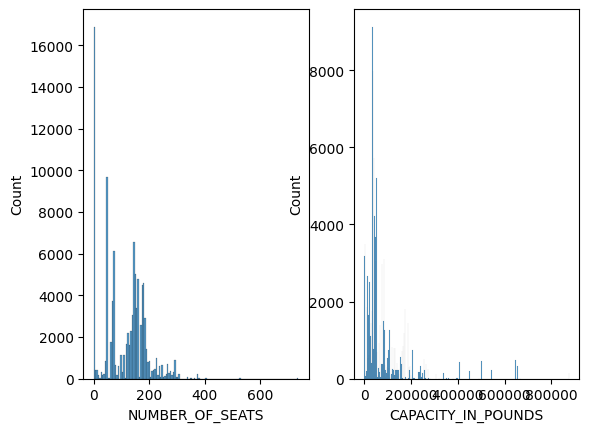

In [62]:
fig, axs = plt.subplots(1,2)
sns.histplot(trimventory["NUMBER_OF_SEATS"], ax=axs[0])
sns.histplot(trimventory["CAPACITY_IN_POUNDS"], ax=axs[1])
plt.show()

In [63]:
trimventory["NUMBER_OF_SEATS_BOXCOX"] = sps.boxcox(trimventory["NUMBER_OF_SEATS"]+1)[0]
trimventory["CAPACITY_IN_POUNDS_BOXCOX"] = sps.boxcox(trimventory["CAPACITY_IN_POUNDS"]+1)[0]

<ipython-input-63-51dc33885b87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimventory["NUMBER_OF_SEATS_BOXCOX"] = sps.boxcox(trimventory["NUMBER_OF_SEATS"]+1)[0]
<ipython-input-63-51dc33885b87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimventory["CAPACITY_IN_POUNDS_BOXCOX"] = sps.boxcox(trimventory["CAPACITY_IN_POUNDS"]+1)[0]


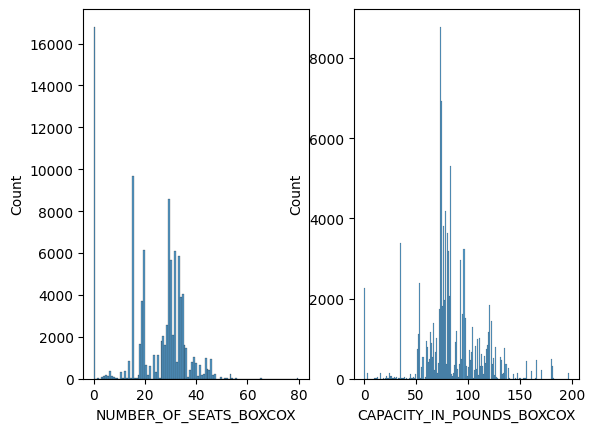

In [64]:
fig, axs = plt.subplots(1,2)
sns.histplot(trimventory["NUMBER_OF_SEATS_BOXCOX"], ax=axs[0])
sns.histplot(trimventory["CAPACITY_IN_POUNDS_BOXCOX"], ax=axs[1])
plt.show()

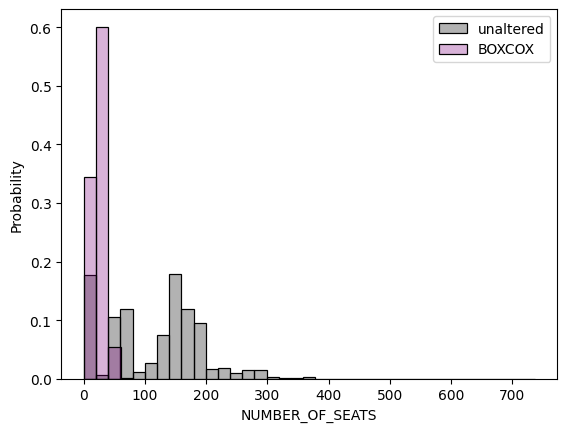

In [65]:
fig, ax = plt.subplots(1, 1)
sns.histplot(trimventory['NUMBER_OF_SEATS'], binwidth=20, stat='probability', alpha=0.3, color='k', label='unaltered')
sns.histplot(trimventory['NUMBER_OF_SEATS_BOXCOX'], binwidth=20, stat='probability', alpha=0.3, color='purple', label='BOXCOX')
ax.legend()

<Axes: xlabel='CAPACITY_IN_POUNDS', ylabel='Count'>

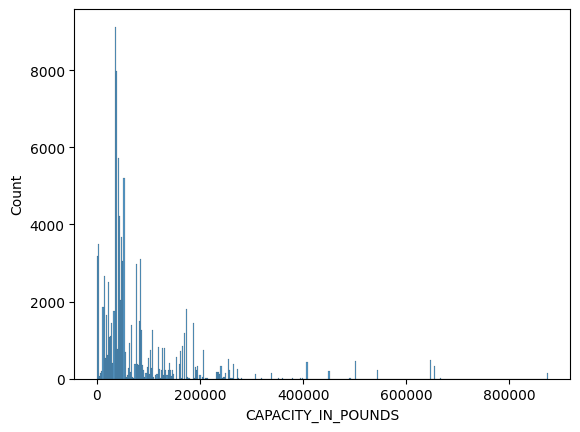

In [66]:
sns.histplot(trimventory["CAPACITY_IN_POUNDS"])

<Axes: xlabel='CAPACITY_IN_POUNDS_BOXCOX', ylabel='Count'>

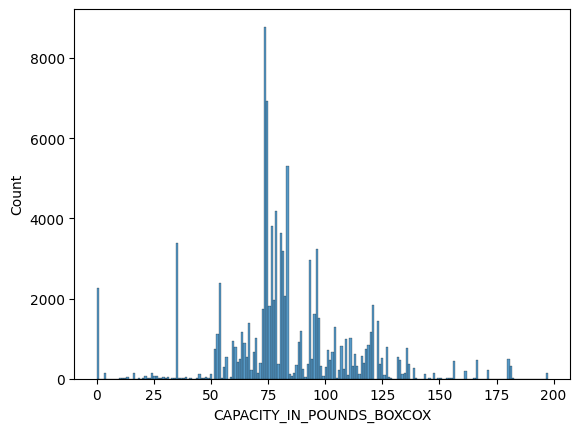

In [67]:
sns.histplot(trimventory["CAPACITY_IN_POUNDS_BOXCOX"])

# Question 5

In [68]:
trimventory["SIZE"]=pd.qcut(trimventory["NUMBER_OF_SEATS"], q=4, labels=["SMALL", "MEDIUM", "LARGE", "XLARGE"])

<ipython-input-68-ea266a348a11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimventory["SIZE"]=pd.qcut(trimventory["NUMBER_OF_SEATS"], q=4, labels=["SMALL", "MEDIUM", "LARGE", "XLARGE"])


In [69]:
# Count within each SIZE and OPERATING_STATUS
op_counts = trimventory.groupby(['SIZE', 'OPERATING_STATUS']).size().reset_index(name='count')
op_counts['proportion'] = op_counts.groupby('SIZE')['count'].transform(lambda x: x / x.sum())
# Count within each SIZE and AIRCRAFT_STATUS
status_counts = trimventory.groupby(['SIZE', 'AIRCRAFT_STATUS']).size().reset_index(name='count')
status_counts['proportion'] = status_counts.groupby('SIZE')['count'].transform(lambda x: x / x.sum())


<ipython-input-69-9e3acec0a59f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  op_counts = trimventory.groupby(['SIZE', 'OPERATING_STATUS']).size().reset_index(name='count')
<ipython-input-69-9e3acec0a59f>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  op_counts['proportion'] = op_counts.groupby('SIZE')['count'].transform(lambda x: x / x.sum())
<ipython-input-69-9e3acec0a59f>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this war

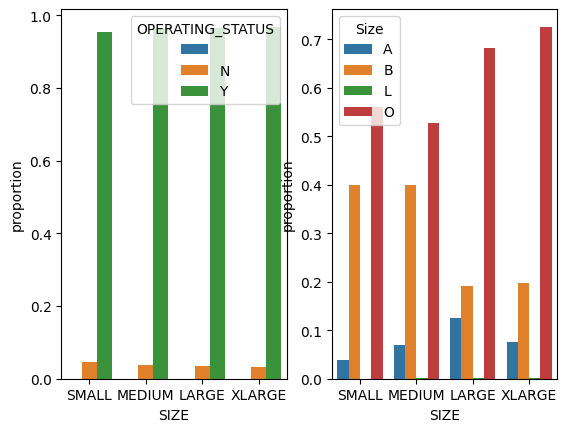

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2)
sns.barplot(data=op_counts, x='SIZE', y='proportion', hue='OPERATING_STATUS', ax=ax[0])
sns.barplot(data=status_counts, x='SIZE', y='proportion', hue='AIRCRAFT_STATUS', ax=ax[1])
plt.legend(title="Size")
plt.show()


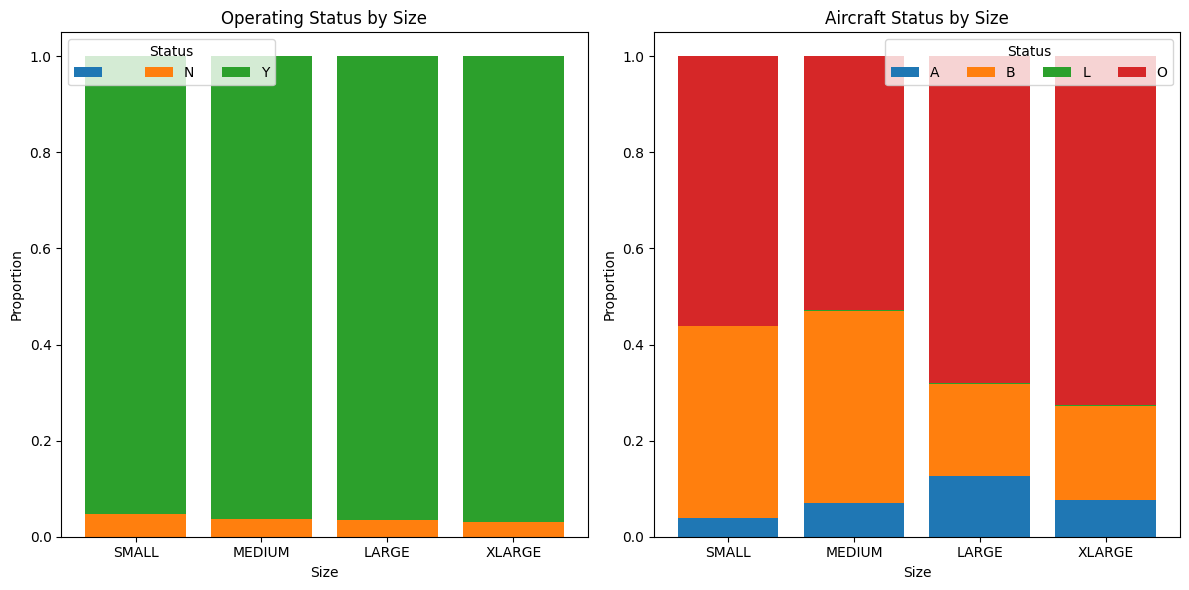

In [71]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# --- First subplot: stack by OPERATING_STATUS ---
# Pivot the data so SIZE is index, OPERATING_STATUS is columns, values are proportions
pivot_op = op_counts.pivot(index='SIZE', columns='OPERATING_STATUS', values='proportion').fillna(0)

# Plot stacked bar manually
bottoms = None
for status in pivot_op.columns:
    ax[0].bar(pivot_op.index, pivot_op[status], label=status, bottom=bottoms)
    if bottoms is None:
        bottoms = pivot_op[status]
    else:
        bottoms += pivot_op[status]
ax[0].set_title("Operating Status by Size")
ax[0].set_xlabel("Size")
ax[0].set_ylabel("Proportion")

# --- Second subplot: stack by AIRCRAFT_STATUS ---
pivot_status = status_counts.pivot(index='SIZE', columns='AIRCRAFT_STATUS', values='proportion').fillna(0)

bottoms = None
for status in pivot_status.columns:
    ax[1].bar(pivot_status.index, pivot_status[status], label=status, bottom=bottoms)
    if bottoms is None:
        bottoms = pivot_status[status]
    else:
        bottoms += pivot_status[status]
ax[1].set_title("Aircraft Status by Size")
ax[1].set_xlabel("Size")
ax[1].set_ylabel("Proportion")

# Add legend (shared for both)
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles, labels, title="Status", loc="upper left", ncol=len(labels))
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles, labels, title="Status", loc="upper right", ncol=len(labels))

plt.tight_layout()
plt.show()
